### MSSV: 22651711
### HoTen: TranAnhTuan

#### 1. Mô hình hóa bài toán tối ưu

**Biến quyết định**:
- \( x_1 \): Số lượng xe Lead nhập về 
- \( x_2 \): Số lượng xe Vision nhập về

**Hàm mục tiêu (lợi nhuận tối đa)**:
Công ty muốn tối đa hóa lợi nhuận, nên hàm mục tiêu có dạng:
$$
f(x) = 5x_1 + 3.2x_2
$$
Mục tiêu: 
$$
\text{maximize } f(x) = 5x_1 + 3.2x_2
$$

Tương đương với bài toán:
$$
\text{minimize } f(x) = -5x_1 - 3.2x_2
$$

**Ràng buộc**:

1. Ràng buộc về vốn ban đầu:
   - Số vốn ban đầu không vượt quá 36 tỷ:
     $$
     40x_1 + 30x_2 \leq 36000
     $$

2. Ràng buộc về tổng nhu cầu thị trường không vượt quá 1100:
 
     $$
     x_1 + x_2 \leq 1100
     $$

3. Ràng buộc về tính không âm của biến:
    $$
    x_1 \geq 0 
    $$
    $$
    x_2 \geq 0
    $$
4. Ràng buộc về nhu cầu xe Lead không vượt quá 1.5 xe Vision:

    $$
    x_1 \leq 1.5x_2
    $$
Tóm lại, bài toán tối ưu có dạng:

$$
\text{minimize } -5x_1 - 3.2x_2
$$
subject to:
$$
\begin{aligned}
40x_1 + 30x_2 &\leq 36000 \\
x_1 + x_2 &\leq 1100 \\
x_1 &\leq 1.5x_2 \\
x_1, x_2 &\geq 0
\end{aligned}
$$

In [10]:
import cvxpy as cp

# Khai báo các biến
x1 = cp.Variable()
x2 = cp.Variable()

objective = cp.Maximize(5 * x1 + 3.2 * x2)

constraints = [
    40*x1 + 30*x2 <= 36000,
    x1 <= 1.5*x2,  
    x1 + x2 <= 1100,  
    x1 >= 0,
    x2 >= 0 
]

problem = cp.Problem(objective, constraints)
result = problem.solve()

# In kết quả
print("Số xe lead nhập về:", x1.value.round()," Xe")
print("SSố xe Vision nhập về:", x2.value.round()," Xe")
print("Lợi nhuận tối đa:", result.round(),"Triệu VND")

Số xe lead nhập về: 600.0  Xe
SSố xe Vision nhập về: 400.0  Xe
Lợi nhuận tối đa: 4280.0 Triệu VND


### Câu 2:

### a, 

In [2]:
import numpy as np
from scipy.optimize import minimize

# Define the matrix A and vector b
A = np.array([[1, 0], [0, -2]])
b = np.array([-12/5, -2024])

# Define the function f(x)
def f(x):
    x1, x2 = x
    return 0.5 * np.linalg.norm(A @ x - b)**2 - np.log(1 + x1**2)

# Initial guess
x0 = np.array([-23/10, 2024])

# Use scipy.optimize.minimize to find the optimal x
result = minimize(f, x0, method='BFGS')

optimal_x = result.x
optimal_f = result.fun

print("Điểm tối ưu x*:", optimal_x)
print("Giá trị tối ưu p*:", optimal_f)


Điểm tối ưu x*: [  -3.00000546 1011.99999999]
Giá trị tối ưu p*: -2.1225850929767596


### b,

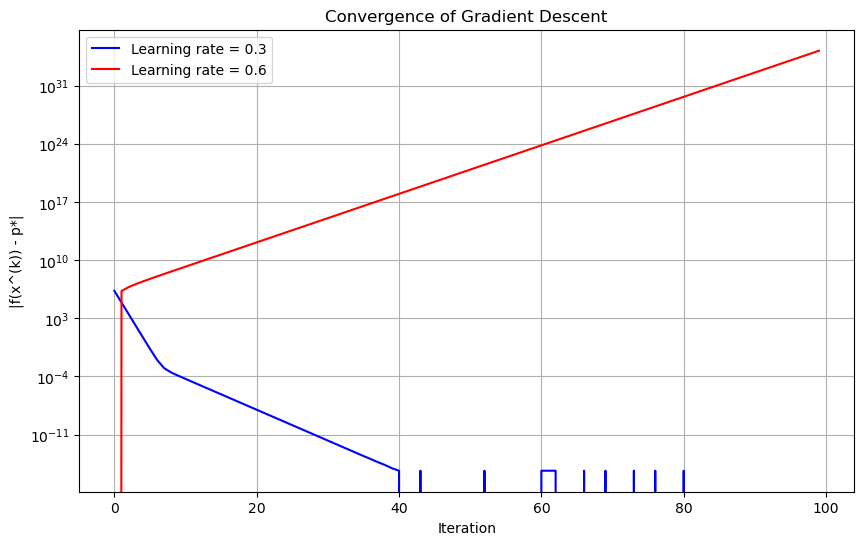

Learning rate 3/10 - Final x and f(x): [  -3. 1012.] -2.1225850929940457
Learning rate 3/5 - Final x and f(x): [-3.0000000e+00 -2.9638488e+17] 1.7568799434748786e+35


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix A and vector b
A = np.array([[1, 0], [0, -2]])
b = np.array([-12/5, -2024])

# Define the objective function f(x)
def f(x):
    x1, x2 = x
    return 0.5 * np.linalg.norm(A @ x - b)**2 - np.log(1 + x1**2)

# Define the gradient of f(x)
def grad_f(x):
    x1, x2 = x
    grad_x1 = (A[0, 0] * (A[0, 0] * x1 - b[0])) - (2 * x1 / (1 + x1**2))
    grad_x2 = A[1, 1] * (A[1, 1] * x2 - b[1])
    return np.array([grad_x1, grad_x2])

# Gradient Descent function
def gradient_descent(x_init, learning_rate, num_iters=100):
    x = x_init
    history_x = []
    history_f = []
    
    for _ in range(num_iters):
        history_x.append(x)
        history_f.append(f(x))
        x = x - learning_rate * grad_f(x)
    
    return np.array(history_x), np.array(history_f)

# Initial guess
x0 = np.array([-23/10, 2024])

# Perform gradient descent for both learning rates
learning_rate_1 = 3/10
learning_rate_2 = 3/5
num_iters = 100

# Gradient descent with learning rate 3/10
history_x_lr1, history_f_lr1 = gradient_descent(x0, learning_rate_1, num_iters)

# Gradient descent with learning rate 3/5
history_x_lr2, history_f_lr2 = gradient_descent(x0, learning_rate_2, num_iters)

# Plotting the error |f(x^(k)) - p*| for both learning rates
plt.figure(figsize=(10, 6))
plt.plot(np.abs(history_f_lr1 - np.min(history_f_lr1)), label=f'Learning rate = {learning_rate_1}', color='b')
plt.plot(np.abs(history_f_lr2 - np.min(history_f_lr2)), label=f'Learning rate = {learning_rate_2}', color='r')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('|f(x^(k)) - p*|')
plt.title('Convergence of Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

# Output final values for inspection
print("Learning rate 3/10 - Final x and f(x):", history_x_lr1[-1], history_f_lr1[-1])
print("Learning rate 3/5 - Final x and f(x):", history_x_lr2[-1], history_f_lr2[-1])


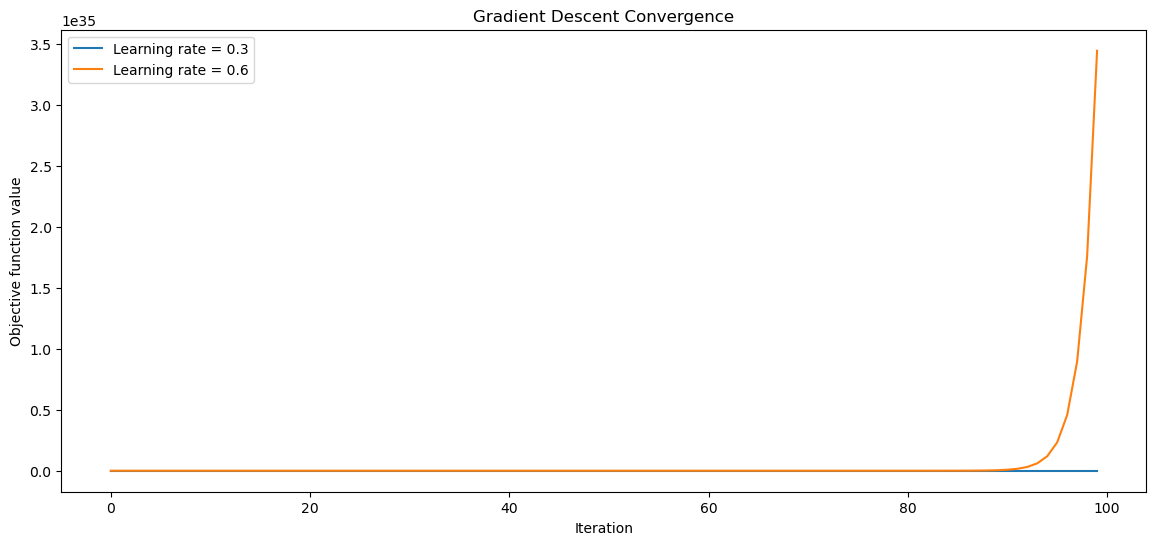

Learning rate: 0.3
Iteration 0: x = [ -2.54939587 809.6       ], f(x) = 81929.5163339736
Iteration 1: x = [  -2.70854457 1052.48      ], f(x) = 3275.1877907572525
Iteration 2: x = [  -2.81092903 1003.904     ], f(x) = 128.98866352860392
Iteration 3: x = [  -2.87712301 1013.6192    ], f(x) = 3.1298120460277095
Iteration 4: x = [  -2.92005036 1011.67616   ], f(x) = -1.9091268844224327
Iteration 5: x = [  -2.94794272 1012.064768  ], f(x) = -2.112621825377099
Iteration 6: x = [  -2.96608816 1011.9870464 ], f(x) = -2.1215820241562944
Iteration 7: x = [  -2.97790197 1012.00259072], f(x) = -2.1222883120963276
Iteration 8: x = [  -2.98559737 1011.99948186], f(x) = -2.12246420746014
Iteration 9: x = [  -2.99061173 1012.00010363], f(x) = -2.122533940631167
Iteration 10: x = [  -2.9938798  1011.99997927], f(x) = -2.122563364432485
Iteration 11: x = [  -2.99601004 1012.00000415], f(x) = -2.122575858708336
Iteration 12: x = [  -2.99739872 1011.99999917], f(x) = -2.1225811681075255
Iteration 13: x =

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#b)
# def grad_f(x):
#     grad = A.T @ (A @ x - b)
#     grad[0] -= 2 * x[0] / (1 + x[0]**2)
#     return grad
def grad_f(x):
    x1, x2 = x
    grad_x1 = (A[0, 0] * (A[0, 0] * x1 - b[0])) - (2 * x1 / (1 + x1**2))
    grad_x2 = A[1, 1] * (A[1, 1] * x2 - b[1])
    return np.array([grad_x1, grad_x2])

def gradient_descent(x0, learning_rate, max_iter):
    x = x0
    history = []
    for i in range(max_iter):
        x = x - learning_rate * grad_f(x)
        history.append((x.copy(), f(x)))
    return history

learning_rates = [0.3, 0.6]
max_iter = 100

histories = []
for lr in learning_rates:
    history = gradient_descent(x0, lr, max_iter)
    histories.append(history)

plt.figure(figsize=(14, 6))

for i, lr in enumerate(learning_rates):
    xs = [h[0] for h in histories[i]]
    fs = [h[1] for h in histories[i]]
    plt.plot(range(max_iter), fs, label=f'Learning rate = {lr}')

plt.xlabel('Iteration')
plt.ylabel('Objective function value')
plt.title('Gradient Descent Convergence')
plt.legend()
plt.show()

for i, lr in enumerate(learning_rates):
    print(f"Learning rate: {lr}")
    for k, (xk, fk) in enumerate(histories[i]):
        print(f"Iteration {k}: x = {xk}, f(x) = {fk}")

- Với learning rate 3/10 thuật toán hội tụ ổn định hơn, xấp xỉ giá trị tối ưu.
- Với learning rate 3/5, giá trị của hàm mục tiêu tăng quá cao, cho thấy thuật toán không hội tụ tốt do learning rate quá lớn.

### Câu 3:
Cho các vector $ c, a_1, a_2,...,a_m \in \mathbb{R}^n $ và các số $ b_1, b_2,...,b_m \in \mathbb{R}^n $ (với $ m \in \mathbb{Z}^+ $), xét bài toán tối ưu:

$$
\min_{x \in \mathbb{R}^n} f(x) = c^T x + \sum_{i=1}^{m} e^{(b_i - a_i^T x)}
$$

#### a) Tính Gradient ∇f và Hessian ∇²f, đồng thời chứng minh rằng f là hàm lồi trên tập xác định của nó.

1. **Gradient ∇f:**

Ta có hàm mục tiêu:

$$
f(x) = c^T x + \sum_{i=1}^{m} e^{(b_i - a_i^T x)}
$$

Gradient của $ f(x) $ theo vector $ x $ là:

$$
\nabla f(x) = c - \sum_{i=1}^{m} a_i e^{(b_i - a_i^T x)}
$$

Giải thích: Đạo hàm của $ e^{(b_i - a_i^T x)} $ theo $ x $ là:

$$
\nabla_x e^{(b_i - a_i^T x)} = - a_i e^{(b_i - a_i^T x)}
$$

2. **Hessian ∇²f:**

Hessian của $ f(x) $ là ma trận đạo hàm bậc hai của $ f(x) $ theo $ x $:

$$
\nabla^2 f(x) = \sum_{i=1}^{m} a_i a_i^T e^{(b_i - a_i^T x)}
$$

Giải thích: Đạo hàm bậc hai của $ - a_i e^{(b_i - a_i^T x)} $ là:

$$
\nabla_x^2 \left( - a_i e^{(b_i - a_i^T x)} \right) = a_i a_i^T e^{(b_i - a_i^T x)}
$$

3. **Chứng minh tính lồi của $ f(x) $:**

Một hàm số $ f(x) $ là hàm lồi nếu ma trận Hessian của nó là nửa xác định dương, tức là:

$$
\nabla^2 f(x) \geq 0
$$

Hessian của hàm $ f(x) $ là tổng của các ma trận có dạng:

$$
a_i a_i^T e^{(b_i - a_i^T x)}
$$

Trong đó:
- $ a_i a_i^T $ là ma trận nửa xác định dương (vì đó là tích của một vector và chuyển vị của chính nó),
- $ e^{(b_i - a_i^T x)} > 0 $ với mọi $ x $.

Do đó, Hessian $ \nabla^2 f(x) $ là tổng của các ma trận nửa xác định dương, nên $ f(x) $ là hàm lồi trên tập xác định của nó.



In [4]:
import numpy as np
from scipy.optimize import fsolve

# Dữ liệu đề bài
A = np.array([
    [0, -1, 2, 1/3],
    [-2, 4, -3, -2/7],
    [0, -2, 5, 0]
])

b = np.array([0, -1, 2, 2])
c = np.array([-1 + 7 * np.exp(1) / 3, 2 - 23 * np.exp(1) / 7, -2 + 5 * np.exp(1)])

# Hàm gradient của f(x)
def gradient_f(x):
    grad = c.copy()
    for i in range(4):
        alpha_i = A[:, i]
        denom = np.exp(b[i] - np.dot(alpha_i, x))  # Tính e^(b_i - a_i^T x)
        grad -= alpha_i * denom  # Công thức gradient
    return grad

# Hàm tìm điểm tối ưu x*
def find_x_star(x0):
    return fsolve(gradient_f, x0)

# Hàm mục tiêu f(x)
def f(x):
    total = np.dot(c, x)
    for i in range(4):
        alpha_i = A[:, i]
        total += np.exp(b[i] - np.dot(alpha_i, x))  # Công thức f(x)
    return total

# Điểm khởi tạo
x0 = np.array([2, 0, 1])

# Tìm điểm tối ưu x* và giá trị tối ưu p*
x_star = find_x_star(x0)
p_star = f(x_star)

# Kết quả
print(f"Điểm tối ưu x*: {x_star}")
print(f"Giá trị tối ưu p*: {p_star}")


Điểm tối ưu x*: [ 3.00000000e+00  1.72903376e-12 -1.00000000e+00]
Giá trị tối ưu p*: 11.873127313836182


C:\Users\Asus\AppData\Local\Temp\ipykernel_17284\1991676414.py:8: RuntimeWarning: overflow encountered in exp
  return c.T @ x + np.sum(np.exp(b - Ax))  # Sửa lại theo đề bài mới


Iteration 1: x = [1.74284128 0.89601805 0.44913073], f(x) = 20.143054979700032, alpha = 0.010643187177228947
Iteration 2: x = [ 1.54877808  0.43821074 -0.20492389], f(x) = 13.922179503740335, alpha = 0.06465237692528875
Iteration 3: x = [ 1.58337644  0.33727878 -0.1445419 ], f(x) = 13.321729075979576, alpha = 0.011354769421289547
Iteration 4: x = [ 1.55612245  0.22742325 -0.3125554 ], f(x) = 12.864500162055304, alpha = 0.04847372243960479
Iteration 5: x = [ 1.5786678   0.16849108 -0.27767978], f(x) = 12.639794231780158, alpha = 0.01097169763153406
Iteration 6: x = [ 1.57103898  0.10373243 -0.38217605], f(x) = 12.47255404746129, alpha = 0.04768532494488773
Iteration 7: x = [ 1.58692158  0.06706993 -0.360615  ], f(x) = 12.377853602220188, alpha = 0.010551710503536491
Iteration 8: x = [ 1.5896046   0.02770975 -0.42951962], f(x) = 12.308939203875298, alpha = 0.04729455334397654
Iteration 9: x = [ 1.60146742  0.00430953 -0.41569086], f(x) = 12.266789164609476, alpha = 0.010234381465736799
I

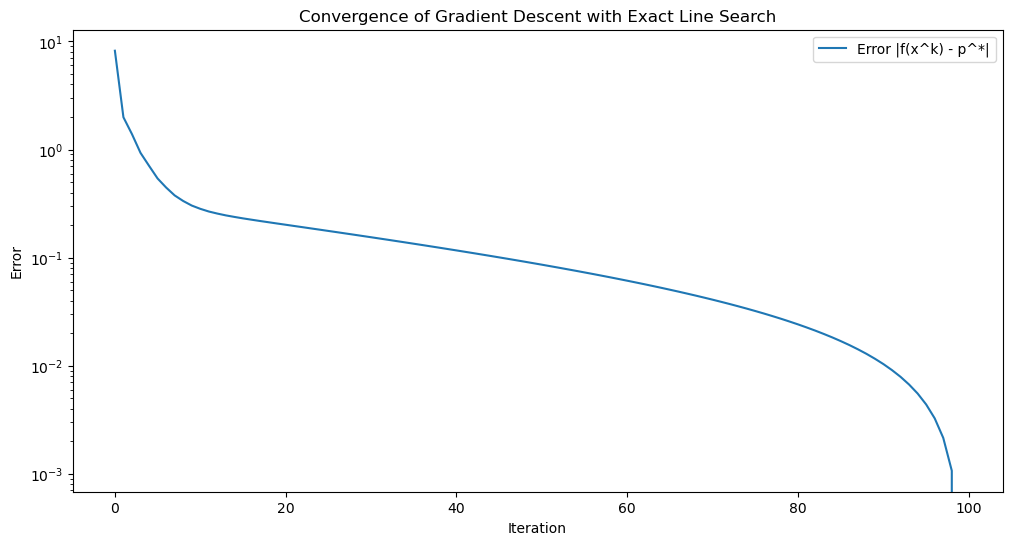

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Hàm mục tiêu f(x)
def f(x, c, A, b):
    Ax = A.T @ x
    return c.T @ x + np.sum(np.exp(b - Ax))  # Sửa lại theo đề bài mới

# Gradient của f(x)
def grad_f(x, c, A, b):
    Ax = A.T @ x
    return c - A @ np.exp(b - Ax)  # Đạo hàm theo x với đề bài mới

# Tìm alpha với exact line search
def exact_line_search(x, d, c, A, b):
    func = lambda alpha: f(x + alpha * d, c, A, b)
    res = minimize_scalar(func)
    return res.x

# Thuật toán Gradient Descent với exact line search
def gradient_descent(x0, c, A, b, max_iter=100, tol=1e-6):
    x = x0
    history = []
    for k in range(max_iter):
        grad = grad_f(x, c, A, b)
        if np.linalg.norm(grad) < tol:
            print(f"Convergence reached at iteration {k+1}")
            break
        alpha = exact_line_search(x, -grad, c, A, b)
        x = x - alpha * grad
        fx = f(x, c, A, b)
        history.append((x.copy(), fx))
        print(f"Iteration {k+1}: x = {x}, f(x) = {fx}, alpha = {alpha}")
    return history

# Dữ liệu được cho trong đề bài
A = np.array([
    [0, -1, 2, 1/3],
    [-2, 4, -3, -2/7],
    [0, -2, 5, 0]
])
b = np.array([0, -1, 2, 2])
c = np.array([-1 + 7 * np.exp(1) / 3, 2 - 23 * np.exp(1) / 7, -2 + 5 * np.exp(1)])

# Điểm khởi tạo
x0 = np.array([2, 0, 1])

# Thực hiện gradient descent
history = gradient_descent(x0, c, A, b)

# Trích xuất các giá trị hàm f và lỗi sai số
f_values = [fx for _, fx in history]
p_star = min(f_values) if f_values else np.inf
errors = [abs(fx - p_star) for fx in f_values]

# Vẽ đồ thị sai số
plt.figure(figsize=(12, 6))
plt.plot(errors, label='Error |f(x^k) - p^*|')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.title('Convergence of Gradient Descent with Exact Line Search')
plt.show()


- Kết luận:

1. **Hội tụ dần dần**: Đồ thị cho thấy sai số giảm đều đặn qua các lần lặp. Điều này cho thấy thuật toán Gradient Descent với exact line search đang hoạt động hiệu quả và dần tiến tới giá trị tối ưu \( p^* \).

2. **Hội tụ nhanh trong giai đoạn đầu**: Từ khoảng 0 đến 40 lần lặp, sai số giảm rất nhanh. Đây là một đặc điểm phổ biến của thuật toán Gradient Descent, khi nó thường có tốc độ hội tụ nhanh lúc đầu.

3. **Hội tụ chậm hơn ở giai đoạn sau**: Sau khoảng 40 lần lặp, sai số vẫn giảm nhưng với tốc độ chậm hơn, thể hiện qua việc đường cong phẳng hơn. Điều này cho thấy thuật toán tiến gần đến giá trị tối ưu nhưng sự thay đổi về giá trị hàm mục tiêu trở nên nhỏ dần khi nó tiệm cận tới điểm tối ưu.

4. **Hội tụ chính xác**: Đến gần 100 lần lặp, sai số giảm xuống một mức rất nhỏ (\(10^{-3}\)), điều này cho thấy thuật toán đã tiệm cận đến điểm tối ưu hoặc rất gần với giá trị tối ưu \( p^* \).

**Kết luận**: Thuật toán Gradient Descent với exact line search đã hội tụ tốt và đạt giá trị tối ưu với sai số rất nhỏ. Việc sử dụng exact line search giúp điều chỉnh bước nhảy (learning rate) phù hợp, cải thiện tốc độ hội tụ của thuật toán, đặc biệt là trong các giai đoạn đầu tiên.